## Auction Duration Stats
### By: Brianj (https://twitter.com/pbrianandj)

In [5]:
from matplotlib import pyplot as plt

In [15]:
from python_graphql_client import GraphqlClient
import numpy as np

# Instantiate the client with an endpoint.
client = GraphqlClient(endpoint="https://api.thegraph.com/subgraphs/name/nounsdao/nouns-subgraph")

In [68]:
# Create the query string and variables required for the request.
query = """
    {
  auctions(first: 500, orderBy: id) {
    id,
    startTime
    endTime
    bids {
        id
        blockTimestamp
        blockNumber
    }
  }
}
"""
# Synchronous request
data = client.execute(query=query)

In [69]:
diff = []
auction_id = []

pairs = []
for auction in data['data']['auctions']:
    duration = (int(auction['endTime']) - int(auction['startTime']))/(3600)
    diff.append(duration)
    auction_id.append(auction['id'])
    pairs.append((int(auction['id']), duration))

## Longest Auction

In [70]:
print(f"Longest auction duration (hours): {max(diff)}")

Longest auction duration (hours): 24.825555555555557


In [71]:
print(f"Longest auction: {auction_id[diff.index(max(diff))]}")

Longest auction: 99


## Auction Duration Histogram

Text(0, 0.5, 'Number of auctions')

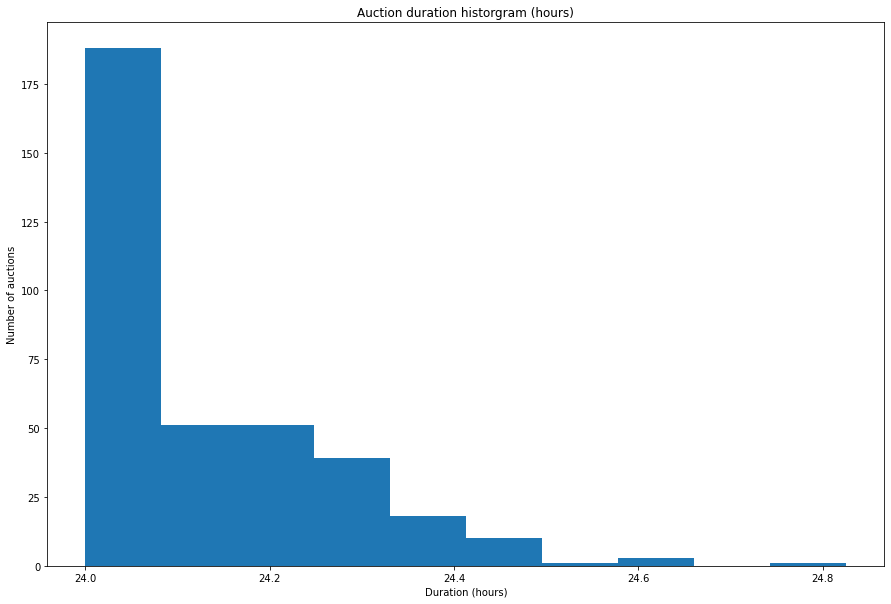

In [72]:
plt.figure(figsize=(15,10))
plt.title("Auction duration historgram (hours)")
plt.hist(diff)
plt.xlabel('Duration (hours)')
plt.ylabel('Number of auctions')

## Auction Duration vs Time

Text(0.5, 0, 'Auction id')

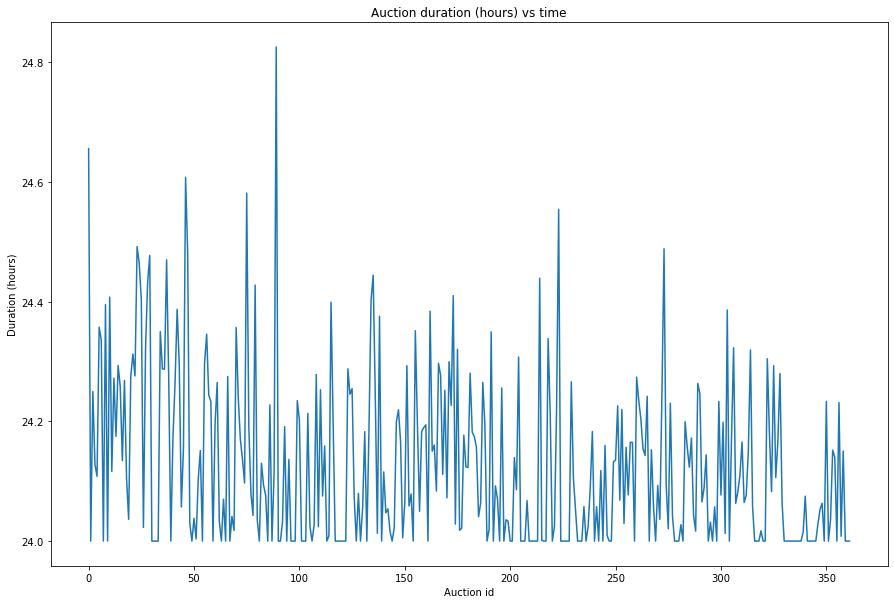

In [73]:
pairs = sorted(pairs, key=lambda x: x[0])
auction_ids, durations = zip(*pairs)
plt.figure(figsize=(15,10))
plt.title("Auction duration (hours) vs time")
plt.plot(durations)
plt.ylabel('Duration (hours)')
plt.xlabel('Auction id')

In [133]:
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


Text(0.5, 0, 'Auction id')

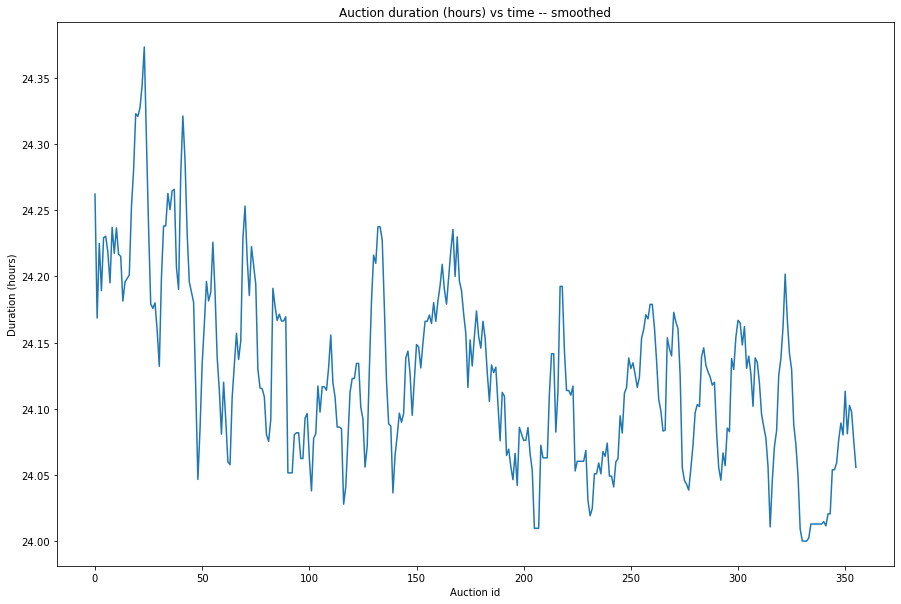

In [134]:
plt.figure(figsize=(15,10))
plt.title("Auction duration (hours) vs time -- smoothed")
plt.plot(moving_average(durations))
plt.ylabel('Duration (hours)')
plt.xlabel('Auction id')

## Time difference between last bid of auction i and start of auction i + 1

In [117]:
auctions = []

for auction in data['data']['auctions']:
    bids = auction['bids']
    last_bid = max(map(lambda x: int(x['blockTimestamp']), bids))
    
    if int(auction['id']) % 10 == 0:
        continue
    auctions.append(
        {
            "auction_id": int(auction['id']),
            "start_time": int(auction['startTime']),
            "last_bid_time": last_bid,
        }
    )

auctions = sorted(auctions, key=lambda x: x['start_time'])
    

In [122]:
diffs = []
for i in range(len(auctions) - 1):
    diffs.append(
        (i, (auctions[i + 1]['start_time'] - auctions[i]['last_bid_time']) / 60, auctions[i])
    )
    

In [123]:
sorted(diffs, key=lambda x: x[1])[-2]

(139,
 1438.75,
 {'auction_id': 155, 'start_time': 1640611817, 'last_bid_time': 1640611935})

In [125]:
minutes_diff = list(map(lambda x: x[1], diffs))

Text(0, 0.5, 'Number of auctions')

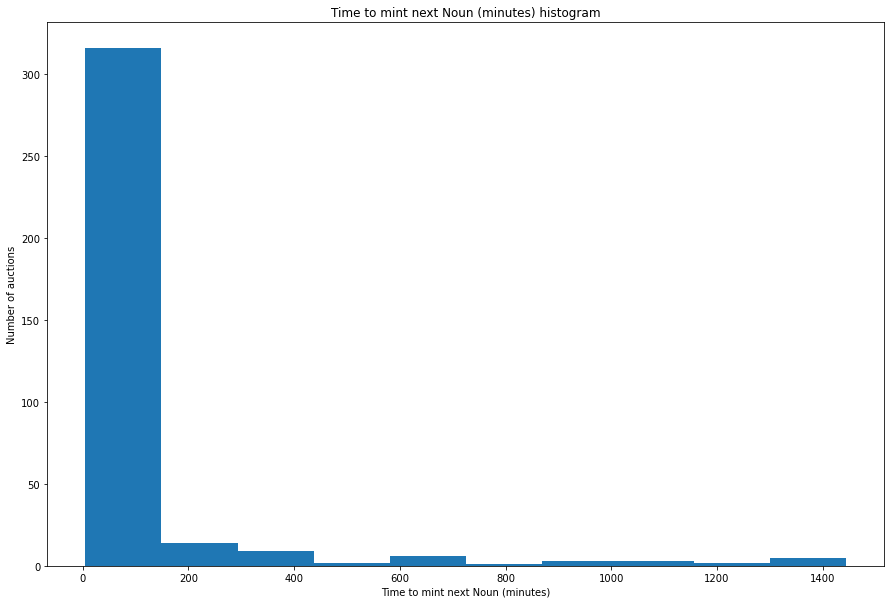

In [128]:
plt.figure(figsize=(15,10))
plt.title("Time to mint next Noun (minutes) histogram")
plt.hist(minutes_diff)
plt.xlabel('Time to mint next Noun (minutes)')
plt.ylabel('Number of auctions')

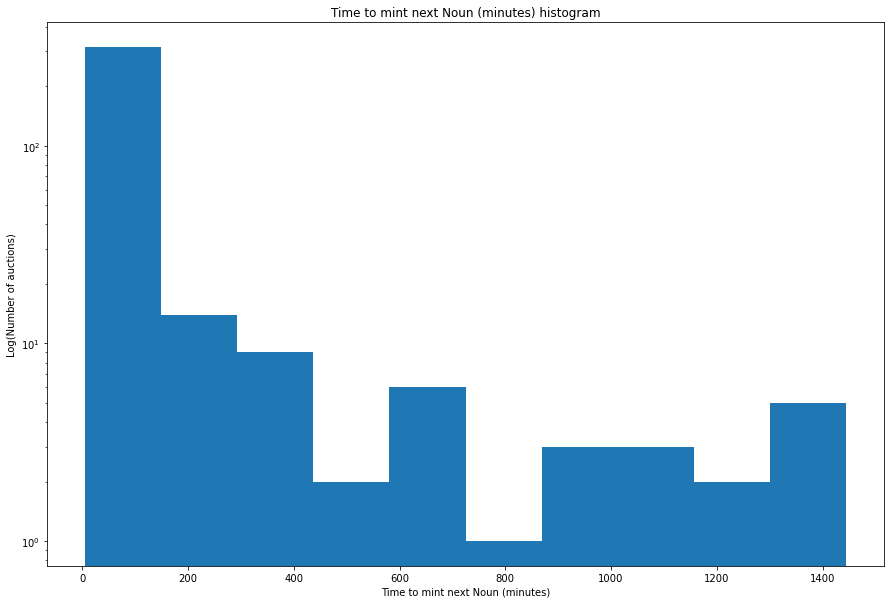

In [130]:
plt.figure(figsize=(15,10))
plt.title("Time to mint next Noun (minutes) histogram")
plt.hist(minutes_diff)
plt.xlabel('Time to mint next Noun (minutes)')
plt.ylabel('Log(Number of auctions)')
plt.yscale('log')

## Unseen Traits

In [137]:
# Create the query string and variables required for the request.
query = """
    {
  nouns(first: 1000 orderBy: id orderDirection: asc) {
  id
  seed {
      body
      head
      glasses
  }
  }
}
"""
# Synchronous request
data = client.execute(query=query)

In [136]:
# These are using the pre 8-8 numbers
TOTAL_HEADS = 234
TOTAL_GLASSES = 21
TOTAL_BODIES = 30

In [141]:
data['data']['nouns']

[{'id': '0', 'seed': {'body': '14', 'head': '94', 'glasses': '18'}},
 {'id': '1', 'seed': {'body': '20', 'head': '88', 'glasses': '14'}},
 {'id': '10', 'seed': {'body': '7', 'head': '103', 'glasses': '11'}},
 {'id': '100', 'seed': {'body': '17', 'head': '59', 'glasses': '19'}},
 {'id': '101', 'seed': {'body': '18', 'head': '27', 'glasses': '14'}},
 {'id': '102', 'seed': {'body': '17', 'head': '98', 'glasses': '10'}},
 {'id': '103', 'seed': {'body': '0', 'head': '111', 'glasses': '12'}},
 {'id': '104', 'seed': {'body': '11', 'head': '227', 'glasses': '13'}},
 {'id': '105', 'seed': {'body': '10', 'head': '129', 'glasses': '7'}},
 {'id': '106', 'seed': {'body': '0', 'head': '230', 'glasses': '16'}},
 {'id': '107', 'seed': {'body': '20', 'head': '37', 'glasses': '7'}},
 {'id': '108', 'seed': {'body': '18', 'head': '56', 'glasses': '19'}},
 {'id': '109', 'seed': {'body': '3', 'head': '198', 'glasses': '9'}},
 {'id': '11', 'seed': {'body': '21', 'head': '34', 'glasses': '14'}},
 {'id': '110'

In [143]:
seen_heads = set()
seen_glasses = set()
seen_bodies = set()

nouns = [ (int(noun['id']), noun) for noun in data['data']['nouns']]
nouns = sorted(nouns)

In [147]:
head_ratio = []
glasses_ratio = []
bodies_ratio = []
for noun_id, noun in nouns:
    seen_heads.add(noun['seed']['head'])
    seen_glasses.add(noun['seed']['glasses'])
    seen_bodies.add(noun['seed']['body'])
    
    head_ratio.append(
        len(seen_heads)/TOTAL_HEADS
    )
    glasses_ratio.append(
        len(seen_glasses)/TOTAL_GLASSES
    )
    bodies_ratio.append(
        len(seen_bodies)/TOTAL_BODIES
    )
    
    
    
    

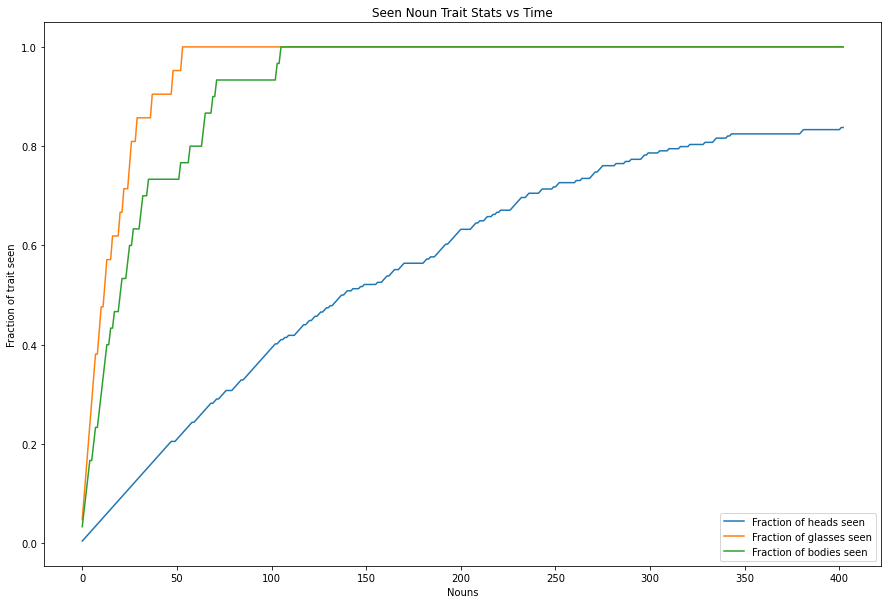

In [151]:
plt.figure(figsize=(15,10))
plt.plot(head_ratio, label="Fraction of heads seen")
plt.plot(glasses_ratio, label="Fraction of glasses seen")
plt.plot(bodies_ratio, label="Fraction of bodies seen")
plt.title("Seen Noun Trait Stats vs Time")
plt.xlabel("Nouns")
plt.ylabel("Fraction of trait seen")
plt.legend()
plt.show()